multiple linear regression 
understanding the data 
reading the data 
applying multiple regression 
prediction 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
csv_file_path = "C:\\Users\\USER\\Desktop\\CO2 Emissions_Canada.csv"


In [6]:
df = pd.read_csv(csv_file_path)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
cdf =df[['Engine Size(L)', 'Cylinders' , 'Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
cdf.head(9)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


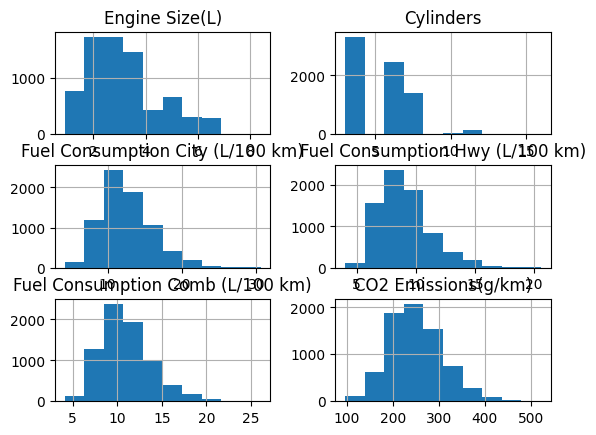

In [10]:
cdf.hist()
plt.show()

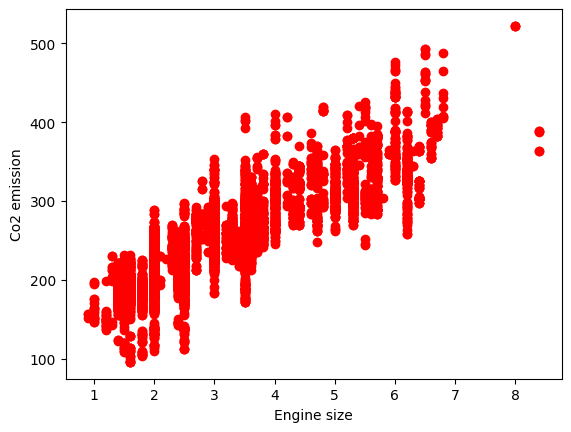

In [14]:
plt.scatter(cdf['Engine Size(L)'], cdf['CO2 Emissions(g/km)'], color='red')
plt.xlabel("Engine size")
plt.ylabel("Co2 emission")
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

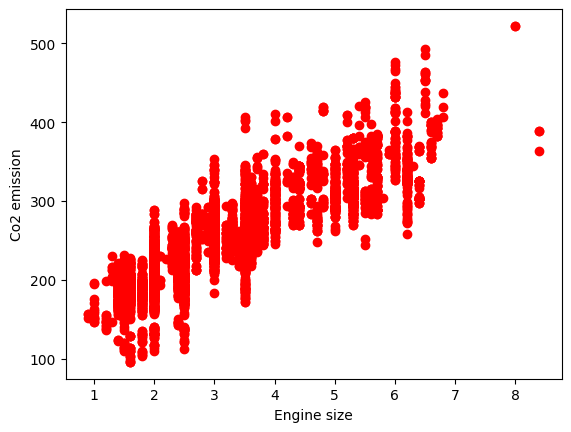

In [17]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'], color='red')
plt.xlabel("Engine size")
plt.ylabel("Co2 emission")
plt.show()


In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)']])
y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 5.6799066   6.67241516 12.99264229]]


In [19]:
y_hat= regr.predict(test[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)']])
x = np.asanyarray(test[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)']])
y = np.asanyarray(test[['CO2 Emissions(g/km)']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 407.36
Variance score: 0.88


c:\USERS\USER\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [20]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)']])
y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)']])
x = np.asanyarray(test[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)']])
y = np.asanyarray(test[['CO2 Emissions(g/km)']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[5.69814477 6.70918144 6.99534009 6.0571881 ]]
Residual sum of squares: 407.52
Variance score: 0.88


c:\USERS\USER\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


[1, 'hello', 3.14, True]
